# Sub-Gaussian random variables

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"

**Definition 2.11** (Sub-gasusian random variable)  
A sub-Gaussian random variable $X$ has quadratic logarithmic moment generating function for all $\lambda\in\mathbb{R}$
$$
    \Lambda_x(\lambda) = \log\mathbb{E}[\exp(\lambda X)] \leq \lambda\mu + \frac{\lambda^2 b}{2}
$$
for $b > 0$ and $\mu = \mathbb{E}[X]$.


**Theorem 2.12** (General bound for sub-Gaussian random variables)  
If $X$ is sub-Gaussian, then for all $t > 0$

$$
\begin{aligned}
    \text{Pr}\left(\bar{X}_N \geq \mu + \sqrt{\frac{2 b t}{N}} \right) &\leq \exp(-t)\\
    \text{Pr}\left(\bar{X}_N \leq \mu - \sqrt{\frac{2 b t}{N}} \right) & \leq \exp(-t)
\end{aligned}
$$

---

Alternatively, let $\delta\in(0,1)$ such that $\delta=\exp(-t)$ and $t = \log(1/\delta)$. We can express the bound above by
$$
    \text{Pr}\left( \hat{X}_N \geq \mu + \sqrt{\frac{2b\log(1/\delta)}{N}} \right) \leq \delta
$$

## Gaussian distribution
A Gaussian random variable $X\sim{\cal N}(\mu, \sigma^2)$ is sub-Gaussian with $b = \sigma^2$.

In [150]:
key = jax.random.PRNGKey(314)

mu, sigma2 = 0.0, 1.0
n_trials, n_samples = 1500, 10
samples = jax.random.normal(key, (n_trials, n_samples)) * jnp.sqrt(sigma2)
xbar = samples.mean(axis=-1)

In [146]:
b = sigma2

def ubound_mean(delta, N, mu, b):
    return mu + jnp.sqrt(2 * b * jnp.log(1 / delta) / N)

In [155]:
delta_values = jnp.linspace(0, 1, 502)[1:-1]

bound_values = jax.vmap(ubound_mean, (0, None, None, None))(delta_values, n_samples, mu, b)
# Empirical delta for lower-bounded xbar
empirical_delta = (xbar[:, None] >= bound_values[None, :]).mean(axis=0)

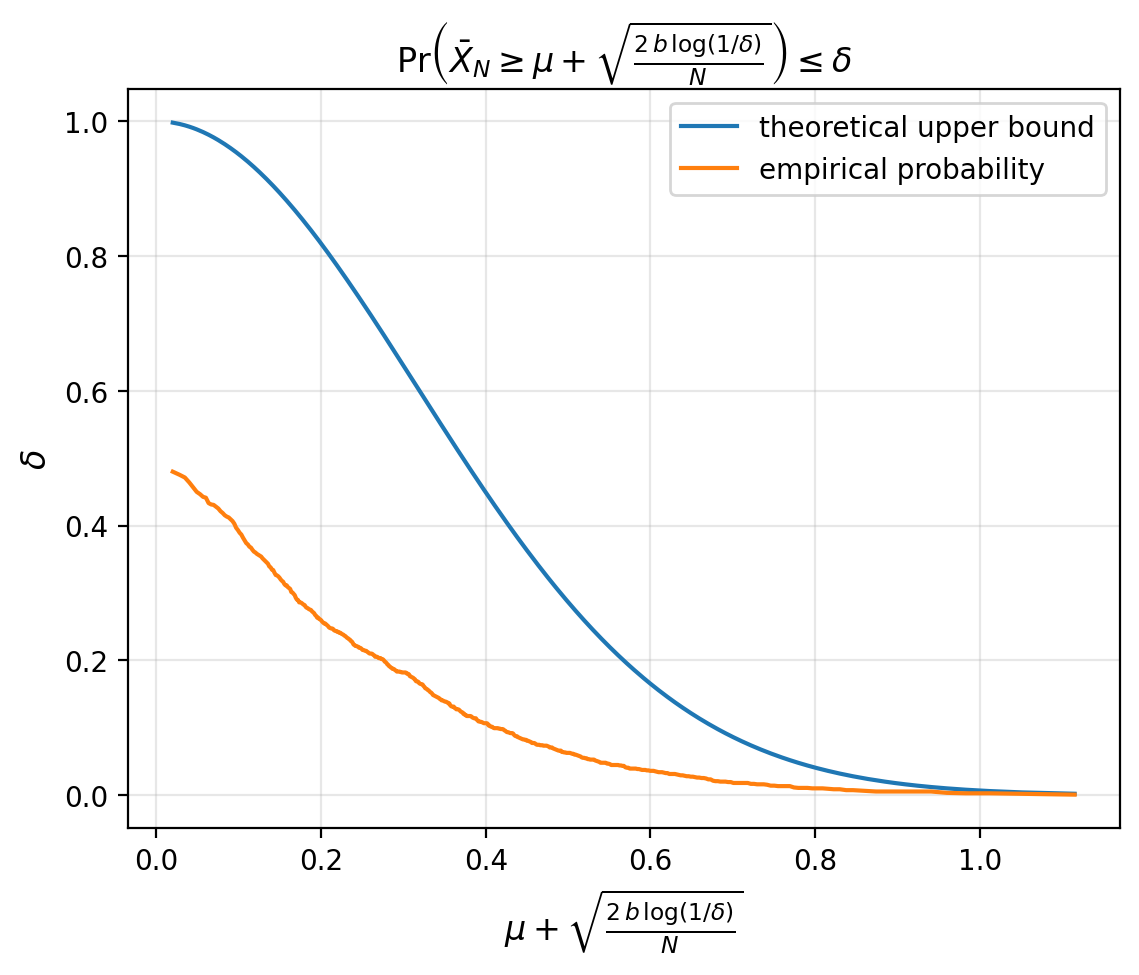

In [156]:
plt.plot(bound_values, delta_values, label="theoretical upper bound")
plt.plot(bound_values, empirical_delta, label="empirical probability")

plt.ylabel("$\delta$", fontsize=12)
plt.xlabel(r"$\mu + \sqrt{\frac{2\,b\,\log(1 / \delta)}{N}}$", fontsize=12)
plt.title(r"$\mathrm{Pr}\left(\bar{X}_N \geq \mu + \sqrt{\frac{2\,b\,\log(1 / \delta)}{N}}\right) \leq \delta$")
plt.legend()
plt.grid(alpha=0.3)